In [1]:
import matplotlib.pyplot as plt
from visualizer import print_result, display_stocks_graph
import pandas as pd
import yfinance as yf
import time
import numpy as np

#### Get Yahoo Finance Data

In [2]:
import os
from import_stocks import read_stock_symbols
from yahoo_data_provider import get_yahoo_data

# Define the base path relative to the current working directory
base_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'assets'))
stocks_symbol_list_path = os.path.join(base_path, 'nasdaq_100_stocks.csv')

stocks = read_stock_symbols(stocks_symbol_list_path, num_symbols=5)
start_date=(2018, 1, 1)
end_date=(2020, 1, 1)

data, tickers, mu, sigma = get_yahoo_data(stocks, start_date, end_date)

print("Stocks: ", stocks)
print("Mean return: ", mu)
print("Covariance: ", sigma)

Stocks:  ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN']
Mean return:  [0.00127331 0.00139123 0.00058917 0.00057577 0.00105956]
Covariance:  [[0.00030072 0.00017684 0.00017932 0.00017642 0.00020524]
 [0.00017684 0.00023657 0.00018949 0.00018884 0.00022097]
 [0.00017932 0.00018949 0.00027228 0.00026919 0.00021745]
 [0.00017642 0.00018884 0.00026919 0.00026873 0.00021548]
 [0.00020524 0.00022097 0.00021745 0.00021548 0.00036201]]


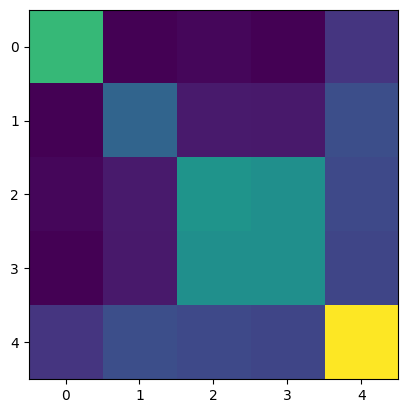

In [3]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

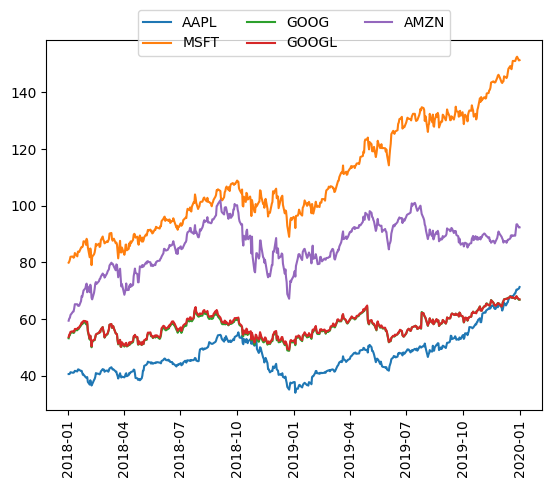

In [4]:
display_stocks_graph(data)

### Define Portfolio Optimization Problem

In [5]:
from portfolio import define_portfolio_optimization_problem

q = 0.5  # set risk factor
budget = 3  # set budget

portfolio, portfolio_quadratic_program = define_portfolio_optimization_problem(expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget)
print("Portfolio Quadratic Program: ", portfolio_quadratic_program)

Portfolio Quadratic Program:  minimize 0.0001503603554633771*x_0^2 + 0.00017683630931764174*x_0*x_1 + 0.00017932052014507405*x_0*x_2 + 0.0001764195125873252*x_0*x_3 + 0.000205243133829386*x_0*x_4 + 0.00011828317410478826*x_1^2 + 0.0001894924308819382*x_1*x_2 + 0.00018884393728546857*x_1*x_3 + 0.00022096620607153683*x_1*x_4 + 0.00013614208488725064*x_2^2 + 0.00026919327460403383*x_2*x_3 + 0.00021744609204961263*x_2*x_4 + 0.00013436266419996728*x_3^2 + 0.00021547803138948136*x_3*x_4 + 0.00018100406096977173*x_4^2 - 0.001273308100154466*x_0 - 0.0013912266405729046*x_1 - 0.000589172999480696*x_2 - 0.0005757652860410011*x_3 - 0.0010595567458522577*x_4 (5 variables, 1 constraints, 'Portfolio optimization')


### Solve the portfolio optimization problem

#### Solve using NumPyMinimumEigensolver (as a classical reference)

In [6]:
from solver import solve_using_numpy_minimum_eigensolver

result = solve_using_numpy_minimum_eigensolver(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1.], value -0.0027
Optimal Companies: ['AAPL', 'MSFT', 'AMZN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 1 0 0 1]	-0.0027		1.0000


#### Solve using Solution using `SamplingVQE`

In [7]:
from solver import solve_using_sampling_vqe

num_stocks = len(stocks)
result = solve_using_sampling_vqe(portfolio_quadratic_program, num_stocks)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1.], value -0.0027
Optimal Companies: ['AAPL', 'MSFT', 'AMZN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 0 1 1 1]	-0.0011		0.3398
[0 1 1 0 1]	-0.0020		0.1680
[1 1 0 0 1]	-0.0027		0.1533
[0 0 1 1 0]	-0.0006		0.0938
[0 1 0 0 1]	-0.0019		0.0674
[1 1 0 1 0]	-0.0023		0.0420
[1 0 1 1 1]	-0.0016		0.0381
[1 0 1 1 0]	-0.0014		0.0293
[0 1 1 0 0]	-0.0015		0.0176
[0 1 0 0 0]	-0.0013		0.0098
[1 1 1 0 1]	-0.0025		0.0068
[1 0 0 1 0]	-0.0014		0.0068
[0 0 1 0 1]	-0.0011		0.0059
[0 1 0 1 0]	-0.0015		0.0049
[1 0 0 0 0]	-0.0011		0.0039
[1 1 0 0 0]	-0.0022		0.0039
[1 1 0 1 1]	-0.0025		0.0039
[0 0 0 0 1]	-0.0009		0.0020
[1 1 1 0 0]	-0.0023		0.0010
[0 1 0 1 1]	-0.0020		0.0010
[1 0 1 0 1]	-0.0019		0.0010


#### Solve using Solution using `QAOA`

In [11]:
from solver import solve_using_qaoa

num_stocks = len(stocks)
result = solve_using_qaoa(portfolio_quadratic_program)

print_result(stocks, portfolio, result)

Optimal: selection [1. 1. 0. 0. 1. 0.], value -0.0017
Optimal Companies: ['MSFT', 'CAT', 'AMGN']

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 1 0 0 1 0]	-0.0017		0.0566
[1 0 0 0 1 1]	-0.0009		0.0557
[0 0 0 1 1 1]	-0.0002		0.0508
[1 1 1 0 0 0]	-0.0007		0.0498
[1 0 0 1 1 0]	-0.0016		0.0488
[1 0 0 1 0 1]	-0.0005		0.0479
[0 1 0 1 0 1]	0.0002		0.0479
[0 0 1 0 1 1]	0.0005		0.0469
[0 1 0 1 1 0]	-0.0010		0.0459
[0 0 1 1 0 1]	0.0009		0.0459
[0 1 1 0 1 0]	-0.0002		0.0449
[0 1 1 1 0 0]	0.0001		0.0430
[1 0 1 0 1 0]	-0.0008		0.0430
[0 1 0 0 1 1]	-0.0003		0.0410
[1 1 0 1 0 0]	-0.0015		0.0391
[0 1 1 0 0 1]	0.0008		0.0361
[1 1 0 0 0 1]	-0.0007		0.0361
[0 0 1 1 1 0]	-0.0002		0.0352
[1 0 1 0 0 1]	0.0001		0.0352
[1 0 1 1 0 0]	-0.0006		0.0342
[0 1 1 0 1 1]	0.0007		0.0049
[1 0 1 1 1 0]	-0.0008		0.0049
[0 0 1 1 1 1]	0.0008		0.0049
[0 1 1 0 0 0]	0.0001		0.0049
[1 0 1 0 1 1]	-0.0000		0.0049
[0 1 1 1 0 1]	0.0012		0.0049

In [46]:
from get_optimal_stocks import *
from datetime import datetime

# Define start and end dates
start =datetime(*start_date)
end = datetime(*end_date)

# Create an empty dictionary to store dataframes
stock_data = {}

# Define the stock symbols (Yahoo Finance uses different symbols compared to Quandl)
stock_symbols = get_optimal_stocks(tickers, result) # Default :['JPM', 'C', 'BAC', 'WFC']


# Fetch data from Yahoo Finance
for stock_symbol in stock_symbols:
    try:
        stock_df = yf.download(stock_symbol, start=start, end=end)

        # Process the stock data
        stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

        # Store the dataframe in the dictionary
        stock_data[stock_symbol] = stock_df

    except Exception as e:
        print(f"Error retrieving data for symbol: {stock_symbol}. Error message: {e}")



[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
# Access and display dataframes (similar to the original loop)
for stock_name, stock_df in stock_data.items():
    print(f"\n{stock_name} DataFrame Head:")
    print(stock_df.head())




AAPL DataFrame Head:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.615883  102223600   
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.608810  118071600   
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.797432   89738400   
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.261929   94640000   
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.108681   82271200   

            Normed Return  Allocation  
Date                                   
2018-01-02       1.000000    0.300000  
2018-01-03       0.999826    0.299948  
2018-01-04       1.004470    0.301341  
2018-01-05       1.015906    0.304772  
2018-01-08       1.012133    0.303640  

MSFT DataFrame Head:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                

In [18]:
allocations = [0.3, 0.2, 0.4, 0.1]
for (stock_name, stock_df), allocation in zip(stock_data.items(), allocations):
    stock_df['Allocation'] = stock_df['Normed Return'] * allocation


################ Changes to be done here : hard coded #####################
'''# Display the head of the JPM dataframe with allocation
print("\nJPM DataFrame with Allocation Head:")
print(stock_data['JPM'].head())'''

'# Display the head of the JPM dataframe with allocation\nprint("\nJPM DataFrame with Allocation Head:")\nprint(stock_data[\'JPM\'].head())'

In [20]:
# Calculate and add position values to each dataframe
for stock_df in stock_data.values():
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000


################ Changes to be done here : hard coded #####################
'''# Display the head of the JPM dataframe with allocation and position values
print("\nJPM DataFrame with Allocation and Position Values Head:")
print(stock_data['JPM'].head())'''



'# Display the head of the JPM dataframe with allocation and position values\nprint("\nJPM DataFrame with Allocation and Position Values Head:")\nprint(stock_data[\'JPM\'].head())'

In [ ]:
######################### Commented due to hard coding ########################
'''# Extract the position values for each stock
jpm = stock_data['JPM']
citi = stock_data['C']
bofa = stock_data['BAC']
wfc = stock_data['WFC']

# Combine the position values into a single DataFrame and calculate the total position
portfolio_val = pd.concat([jpm['Position Values'], citi['Position Values'], bofa['Position Values'], wfc['Position Values']], axis=1)
portfolio_val.columns = ['JPM Pos', 'CITI Pos', 'BOFA Pos', 'WFC Pos']
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

# Display the head of the portfolio valuation DataFrame
print("\nPortfolio Valuation DataFrame Head:")
print(portfolio_val.head())'''

In [21]:
# Extract the position values for each stock
aapl = stock_data['AAPL']
msft = stock_data['MSFT']
amzn = stock_data['AMZN']
#wfc = stock_data['WFC']

# Combine the position values into a single DataFrame and calculate the total position
portfolio_val = pd.concat([aapl['Position Values'], msft['Position Values'], amzn['Position Values']], axis=1)
portfolio_val.columns = ['AAPL Pos', 'MSFT Pos', 'AMZN Pos']
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

# Display the head of the portfolio valuation DataFrame
print("\nPortfolio Valuation DataFrame Head:")
print(portfolio_val.head())


Portfolio Valuation DataFrame Head:
                 AAPL Pos       MSFT Pos       AMZN Pos      Total Pos
Date                                                                  
2018-01-02  300000.000000  200000.000000  400000.000000  900000.000000
2018-01-03  299947.760963  200930.759225  405110.124153  905988.644342
2018-01-04  301340.971015  202699.278108  406923.402294  910963.651417
2018-01-05  304771.869814  205212.347105  413500.308510  923484.525429
2018-01-08  303639.939477  205421.767931  419464.917657  928526.625065


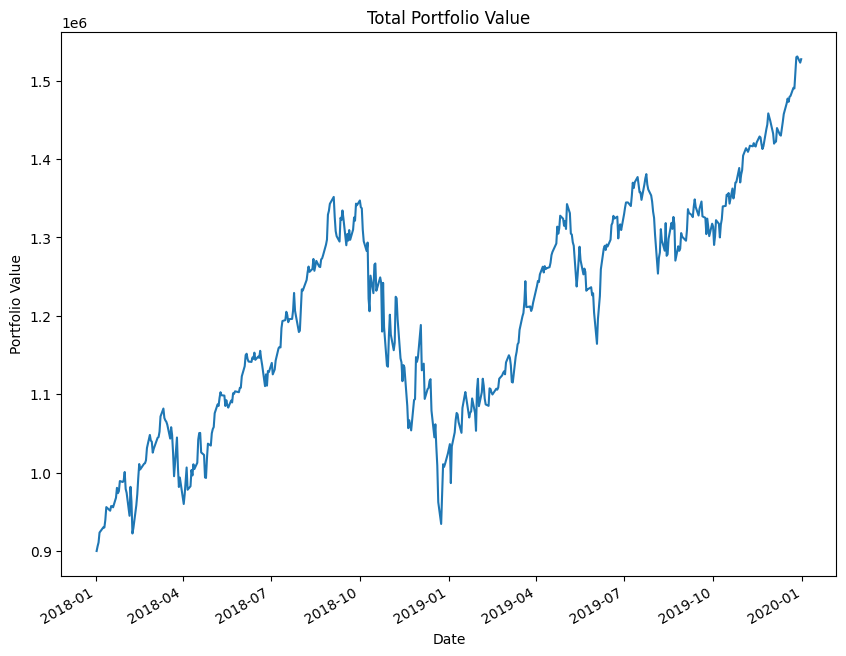

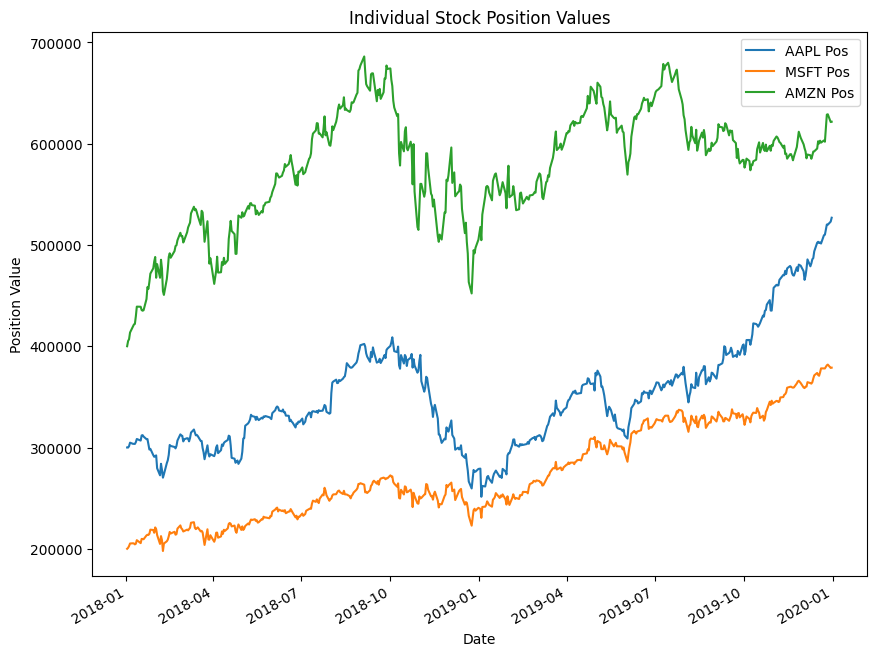

,AAPL Pos,MSFT Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,
2018-01-02,300000.000000,200000.000000,400000.000000,9.000000e+05,NaN
2018-01-03,299947.704615,200930.759314,405110.124153,9.059886e+05,0.006654
2018-01-04,301340.970889,202699.297454,406923.402294,9.109637e+05,0.005491
2018-01-05,304771.897542,205212.328514,413500.308510,9.234845e+05,0.013745
2018-01-08,303639.854606,205421.787537,419464.917657,9.285266e+05,0.005460
...,...,...,...,...,...
2019-12-24,510054.135304,378061.224149,601915.892312,1.490031e+06,-0.000579
2019-12-26,520173.743152,381159.988383,628680.994664,1.530015e+06,0.026834
2019-12-27,519976.508402,381856.721668,629027.490742,1.530861e+06,0.000553


In [10]:
# Plot the total portfolio value
portfolio_val['Total Pos'].plot(figsize=(10, 8))
plt.title('Total Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()

# Plot the individual stock position values
portfolio_val.drop('Total Pos', axis=1).plot(kind='line', figsize=(10, 8))
plt.title('Individual Stock Position Values')
plt.xlabel('Date')
plt.ylabel('Position Value')
plt.show()


portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val

In [23]:
# Calculate the cumulative return
cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
print('Our cumulative return is {} percent!'.format(cum_ret))

Our cumulative return is 69.70599807027324 percent!


C:\Users\awadh\AppData\Local\Temp\ipykernel_11704\4253317811.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)


In [24]:
portfolio_val['Daily Return'].mean()

0.001179457422924333

In [25]:
portfolio_val['Daily Return'].std()

0.01584019939223497

In [26]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.07445975860016732

In [27]:
ASR = (252**0.5)*SR
ASR

1.1820120236276737

In [28]:
################commented due to hard coding##################
'''# Extract and combine the adjusted close prices into a single DataFrame for daily returns
jpm_close = jpm['Adj Close']
citi_close = citi['Adj Close']
bofa_close = bofa['Adj Close']
wfc_close = wfc['Adj Close']

# Combine daily close prices into a single DataFrame
stocks = pd.concat([jpm_close, citi_close, bofa_close, wfc_close], axis=1)
stocks.columns = ['jpm', 'citi', 'bofa', 'wfc']

# Display the head of the daily returns DataFrame
print("\nDaily Returns DataFrame Head:")
print(stocks.head())'''


Daily Returns DataFrame Head:
                  jpm       citi       bofa        wfc
Date                                                  
2018-01-02  89.602844  59.538166  25.813890  50.626553
2018-01-03  89.694153  59.722328  25.727560  51.016048
2018-01-04  90.979088  60.458954  26.064259  51.654167
2018-01-05  90.395035  60.378880  26.185125  52.002235
2018-01-08  90.528511  59.674278  26.003834  51.413834


In [30]:
# Extract and combine the adjusted close prices into a single DataFrame for daily returns
aapl_close = aapl['Adj Close']
msft_close = msft['Adj Close']
amzn_close = amzn['Adj Close']
#wfc_close = wfc['Adj Close']

# Combine daily close prices into a single DataFrame
stocks = pd.concat([aapl_close, msft_close, amzn_close], axis=1)
stocks.columns = ['aapl', 'msft', 'amzn']

# Display the head of the daily returns DataFrame
print("\nDaily Returns DataFrame Head:")
print(stocks.head())


Daily Returns DataFrame Head:
                 aapl       msft       amzn
Date                                       
2018-01-02  40.615883  79.936737  59.450500
2018-01-03  40.608810  80.308746  60.209999
2018-01-04  40.797432  81.015594  60.479500
2018-01-05  41.261929  82.020027  61.457001
2018-01-08  41.108681  82.103729  62.343498


In [31]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,msft,amzn
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.004643,0.012694
2018-01-04,0.004634,0.008763,0.004466
2018-01-05,0.011321,0.012322,0.016033
2018-01-08,-0.003721,0.001020,0.014322


In [32]:
#calculate the log return mean of each stock
log_ret.mean() * 252

aapl    0.282721
msft    0.320657
amzn    0.221326
dtype: float64

In [33]:
# Compute pairwise covariance of columns
log_ret.cov()*252

,aapl,msft,amzn
aapl,0.076300,0.044668,0.051801
msft,0.044668,0.059527,0.055720
amzn,0.051801,0.055720,0.091403


In [34]:
######## Trying one iteration ################

np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4)) # changes to be done here 
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['aapl', 'msft', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return


ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [35]:
######## Trying one iteration ################

np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(3)) # change made here 4 changed to 3
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['aapl', 'msft', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423]


Rebalance to sum to 1.0
[0.46291341 0.51156154 0.02552505]


Expected Portfolio Return
0.30056074088195406


Expected Volatility
0.23626754592671634


Sharpe Ratio
1.2721202977880834


In [ ]:
################## For multiple iteration : Monte Carlo ##########################3
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4)) # Change to be made here 

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [36]:
################## For multiple iteration : Monte Carlo ##########################3
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(3))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [37]:
sharpe_arr.max()

1.3289949912171022

In [38]:
sharpe_arr.argmax()

14873

In [39]:
all_weights[1248,:]

array([0.28155803, 0.61564944, 0.10279253])

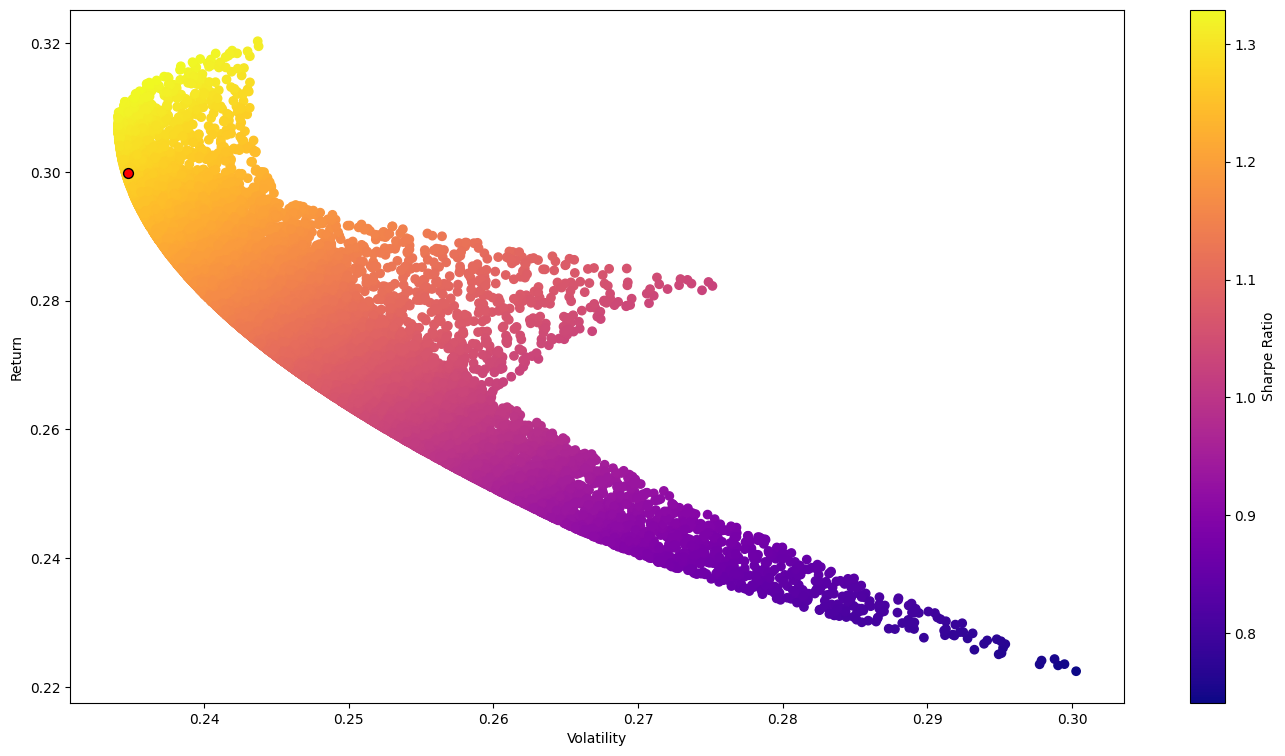

In [40]:
max_sr_ret = ret_arr[1248]
max_sr_vol = vol_arr[1248]
plt.figure(figsize=(17,9))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')